In [1]:
import numpy as np

In [2]:
def adjacency_matrix(X,sigma):
    W=np.zeros((X.shape[0],X.shape[0]))
    for i in range(0,X.shape[0]):
        for j in range(0,X.shape[0]):
            norm=np.square(np.linalg.norm(X[i]-X[j]))
            W[i][j]=np.exp(-norm/(2*sigma**2))
    return W

In [3]:
def Degree_matrix(X,sigma):
    W=adjacency_matrix(X,sigma)
    d=np.sum(W,axis=1)
    D=np.zeros((W.shape[0],W.shape[0]))
    for i in range(D.shape[0]):
        for j in range(D.shape[0]):
            if(i==j):
                D[i][j]=d[i]
    return D

In [5]:
def soln_f(X,sigma,k):
    D=Degree_matrix(X,sigma)
    W=adjacency_matrix(X,sigma)
    #print(D)
    D[np.diag_indices(D.shape[1])] = 1/ (D.diagonal()**0.5)
    L_new=np.dot(D,W).dot(D)
    #print(L_new)
    eigen_vals, eigen_vectors=np.linalg.eigh(L_new)
    #print(eigen_vals)
    sort=sorted(eigen_vals, reverse=True)
    f=np.empty(shape=[len(eigen_vals),0])
    for i in range(0,k):
        #print(sort[i])
        #print("eigen:",eigen_vectors[:,eigen_vals==sort[i]])
        f=np.hstack((f,eigen_vectors[:,eigen_vals==sort[i]]))
    #print(f)
    return f

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

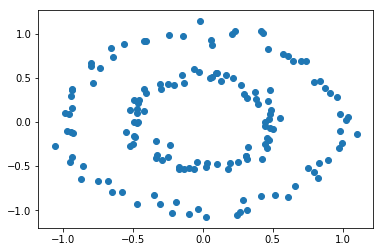

In [7]:
X,y = make_circles(n_samples=150, factor=.5,
                   noise=.05)
plt.scatter(X[:,0],X[:,1])

n_cluster: 1 pos2: 4.6 score: 1.956954186392257e-05


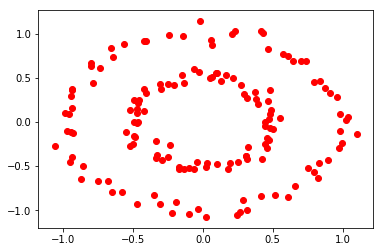

n_cluster: 2 pos2: 0.1 score: 0.02221746837926643


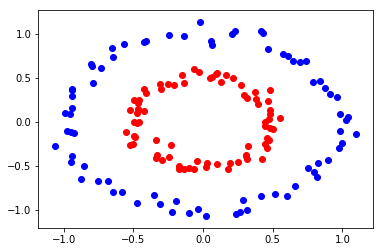

n_cluster: 3 pos2: 0.1 score: 0.2032179801290411


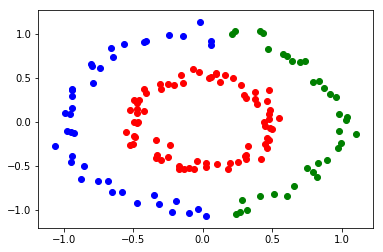

n_cluster: 4 pos2: 0.1 score: 0.6026499977101227


KeyboardInterrupt: 

In [8]:
from sklearn.cluster import KMeans
score=10**6
k=range(1,8,1)
sigma=[]
x,y=0.1,5
c=['red','blue','green','black','lightgrey','cyan','orange']
while x<y:
    sigma.append(x)
    x+=0.5
for i in k:
    score=10**6
    for j in sigma:
        km=KMeans(n_clusters=i, init='k-means++',
                  n_init=10, max_iter=300,
                  tol=1e-04, random_state=0)
        km.fit(soln_f(X,j,i))
        if(score>km.inertia_):
            score=km.inertia_
            pos1=i
            pos2=j
    print("n_cluster:",pos1,"pos2:",pos2,"score:",score)
    km=KMeans(n_clusters=pos1, init='k-means++',
                  n_init=10, max_iter=300,
                  tol=1e-04, random_state=0)
    km.fit(soln_f(X,pos2,pos1))
    y_km=km.predict(soln_f(X,pos2,pos1))
    for a in range(0,i):
        plt.scatter(X[y_km==a,0],X[y_km==a,1],c=c[a])
    plt.show()

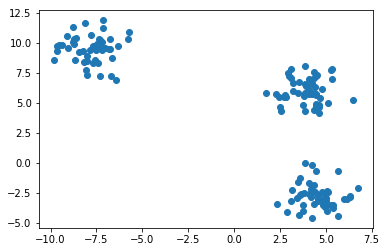

In [17]:
X,y = make_blobs(n_samples=150, random_state=47)
plt.scatter(X[:,0],X[:,1])

In [ ]:
from sklearn.cluster import KMeans
k=range(2,7,1)
sigma=[]
x,y=0.1,5
while x<y:
    sigma.append(x)
    x+=0.4
for i in k:
    score=10**6
    for j in sigma:
        km=KMeans(n_clusters=i, init='k-means++',
                  n_init=10, max_iter=300,
                  tol=1e-04, random_state=0)
        km.fit(soln_f(X,j,i))
        if(score>km.inertia_):
            score=km.inertia_
            pos1=i
            pos2=j
    print("n_cluster:",pos1,"pos2:",pos2,"score:",score)
    km=KMeans(n_clusters=pos1, init='k-means++',
                  n_init=10, max_iter=300,
                  tol=1e-04, random_state=0)
    km.fit(soln_f(X,pos2,pos1))
    y_km=km.predict(soln_f(X,pos2,pos1))
    for a in range(0,i):
        plt.scatter(X[y_km==a,0],X[y_km==a,1],c=c[a])
    plt.show()

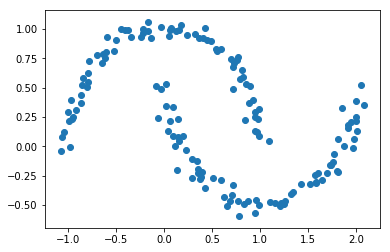

In [11]:
X,y = make_moons(n_samples=150,noise=.05)
plt.scatter(X[:,0],X[:,1])

n_cluster: 2 pos2: 0.1 score: 0.02704145368550686


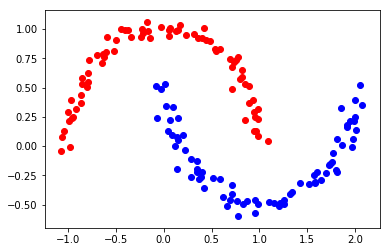

n_cluster: 3 pos2: 0.1 score: 0.18818883199687608


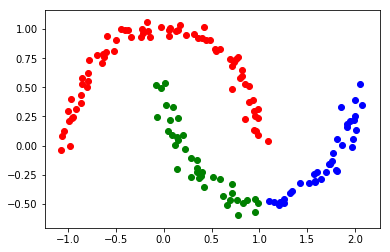

In [12]:
from sklearn.cluster import KMeans
score=10**6
k=range(2,4,1)
sigma=[]
x,y=0.1,5
while x<y:
    sigma.append(x)
    x+=0.4
for i in k:
    score=10**10
    for j in sigma:
        km=KMeans(n_clusters=i, init='k-means++',
                  n_init=10, max_iter=300,
                  tol=1e-04, random_state=0)
        km.fit(soln_f(X,j,i))
        if(score>km.inertia_):
            score=km.inertia_
            pos1=i
            pos2=j
    print("n_cluster:",pos1,"pos2:",pos2,"score:",score)
    km=KMeans(n_clusters=pos1, init='k-means++',
                  n_init=100, max_iter=300,
                  tol=1e-04, random_state=0)
    km.fit(soln_f(X,pos2,pos1))
    y_km=km.predict(soln_f(X,pos2,pos1))
    for a in range(0,i):
        plt.scatter(X[y_km==a,0],X[y_km==a,1],c=c[a])
    plt.show()

In [13]:
filePath1 = "test1_data.txt"
X = np.loadtxt(filePath1, delimiter=" ")

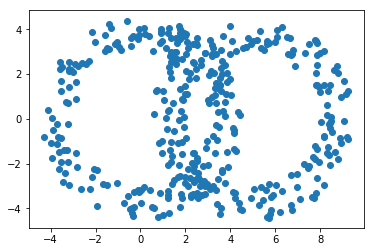

In [14]:
plt.scatter(X[:,0],X[:,1])

n_cluster: 3 pos2: 1.51 score: 0.4602473797583914


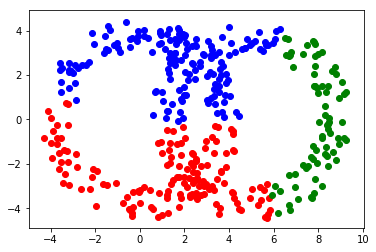

In [16]:
from sklearn.cluster import KMeans
score=10**6
k=range(3,4,1)
sigma=[]
x,y=0.01,2
while x<y:
    sigma.append(x)
    x+=0.5
for i in k:
    score=10**6
    for j in sigma:
        km=KMeans(n_clusters=i, init='k-means++',
                  n_init=10, max_iter=300000,
                  tol=1e-08, random_state=0)
        km.fit(soln_f(X,j,i))
        if(score>km.inertia_):
            score=km.inertia_
            pos1=i
            pos2=j
    print("n_cluster:",pos1,"pos2:",pos2,"score:",score)
    km=KMeans(n_clusters=pos1, init='k-means++',
                  n_init=10, max_iter=300,
                  tol=1e-08, random_state=0)
    km.fit(soln_f(X,pos2,pos1))
    y_km=km.predict(soln_f(X,pos2,pos1))
    for a in range(0,i):
        plt.scatter(X[y_km==a,0],X[y_km==a,1],c=c[a])
    plt.show()

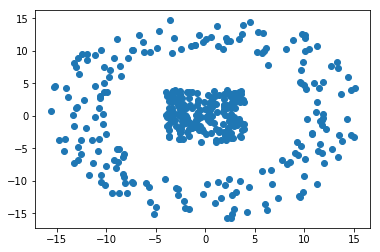

In [18]:
filePath2 = "test2_data.txt"
X = np.loadtxt(filePath2, delimiter=" ")
plt.scatter(X[:,0],X[:,1])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


n_cluster: 1 pos2: 4.8100000000000005 score: 0.09853702301204752


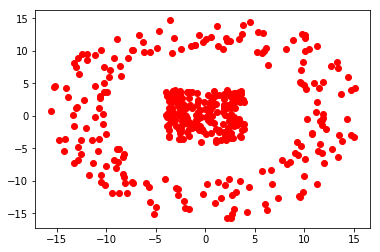

n_cluster: 2 pos2: 2.01 score: 0.030340877962683654


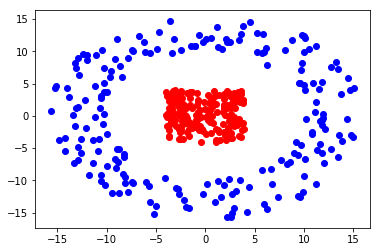

n_cluster: 3 pos2: 0.41000000000000003 score: 0.09026776328917943


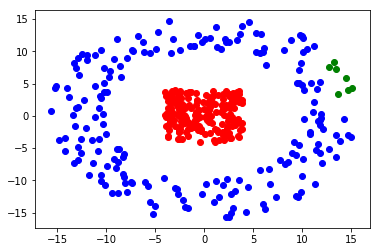

In [19]:
from sklearn.cluster import KMeans
score=10**6
k=range(1,4,1)
sigma=[]
x,y=0.01,5
while x<y:
    sigma.append(x)
    x+=0.4
for i in k:
    score=10**6
    for j in sigma:
        km=KMeans(n_clusters=i, init='k-means++',
                  n_init=10, max_iter=300,
                  tol=1e-04, random_state=0)
        km.fit(soln_f(X,j,i))
        if(score>km.inertia_):
            score=km.inertia_
            pos1=i
            pos2=j
    print("n_cluster:",pos1,"pos2:",pos2,"score:",score)
    km=KMeans(n_clusters=pos1, init='k-means++',
                  n_init=10, max_iter=300,
                  tol=1e-04, random_state=0)
    km.fit(soln_f(X,pos2,pos1))
    y_km=km.predict(soln_f(X,pos2,pos1))
    for a in range(0,i):
        plt.scatter(X[y_km==a,0],X[y_km==a,1],c=c[a])
    plt.show()

In [46]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=100, centers=centers, cluster_std=0.6)

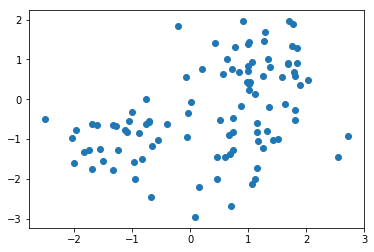

In [47]:
plt.scatter(X[:,0],X[:,1])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


n_cluster: 3 pos2: 1.5 score: 0.34510044228886333


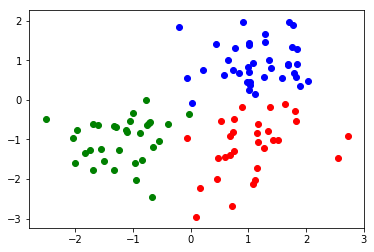

In [48]:
from sklearn.cluster import KMeans
k=[3]
sigma=[1.5]
x,y=0.1,2
#while x<y:
 #   sigma.append(x)
  #  x+=0.4
for i in k:
    score=10**6
    for j in sigma:
        km=KMeans(n_clusters=i, init='k-means++',
                  n_init=10, max_iter=30000,
                  tol=0, random_state=0)
        km.fit(soln_f(X,j,i))
        if(score>km.inertia_):
            score=km.inertia_
            pos1=i
            pos2=j
    print("n_cluster:",pos1,"pos2:",pos2,"score:",score)
    km=KMeans(n_clusters=pos1, init='k-means++',
                  n_init=10, max_iter=30000,
                  tol=0, random_state=0)
    km.fit(soln_f(X,pos2,pos1))
    y_km=km.predict(soln_f(X,pos2,pos1))
    for a in range(0,i):
        plt.scatter(X[y_km==a,0],X[y_km==a,1],c=c[a])
    plt.show()